The objective is to conduct Linear Trend and Mann-Kendall Trend Analysis for daily retweets and likes

In [94]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

from scipy import stats  # Importing stats for linear regression
from sklearn.metrics import mean_squared_error, r2_score
import pymannkendall as mk #for Mann-Kendall Trend Analysis

In [49]:
file= "english_tweets.csv"
twitter_df= pd.read_csv(file, index_col=0)

In [50]:
twitter_df.head()

,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump as a student i used to hear for years fo...,en
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,you get a tie and you get a tie trump s rally ...,en
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,her 15 minutes were over long time ago omarosa...,en
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,there wont be many of them unless you all have...,en
8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one of the single most effective remedies to e...,en


In [51]:
#converting created_at to datetime columm
twitter_df["created_at"]= pd.to_datetime(twitter_df["created_at"])

In [52]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293929 entries, 2 to 776872
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   created_at         293929 non-null  datetime64[ns]
 1   tweet              293929 non-null  object        
 2   likes              293929 non-null  float64       
 3   retweet_count      293929 non-null  float64       
 4   country            293929 non-null  object        
 5   continent          293929 non-null  object        
 6   state              293929 non-null  object        
 7   candidate          293929 non-null  object        
 8   cleaned_tweet      293929 non-null  object        
 9   detected_language  293929 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 24.7+ MB


Separating the data for trump and biden

In [53]:
trump_df= twitter_df[twitter_df["candidate"]=="trump_df"]
biden_df= twitter_df[twitter_df["candidate"]=="biden_df"]

Counting likes and retweets for Trump

In [54]:
trump_count= trump_df.resample("D", on='created_at')["likes", "retweet_count"].sum()
trump_count= trump_count.reset_index()

Counting likes and retweets for Biden

In [55]:
biden_count= biden_df.resample("D", on='created_at')["likes", "retweet_count"].sum()
biden_count= biden_count.reset_index()

Moving Average: It's better to use simple moving average rather than exponential moving average as it will give more smooth line and less fluctuations

In [71]:
trump_count["likes_ma"]= trump_count["likes"].rolling(10).mean()
trump_count["retweet_ma"]= trump_count["retweet_count"].rolling(10).mean()

biden_count["likes_ma"]=  biden_count["likes"].rolling(10).mean()
biden_count["retweet_ma"]= biden_count["retweet_count"].rolling(10).mean()

In [72]:
trump_count

,created_at,likes,retweet_count,likes_ma,retweet_ma
0,2020-10-15,40722.0,13063.0,NaN,NaN
1,2020-10-16,97256.0,25826.0,NaN,NaN
2,2020-10-17,23418.0,8970.0,NaN,NaN
3,2020-10-18,44070.0,13911.0,NaN,NaN
4,2020-10-19,29847.0,11778.0,NaN,NaN
5,2020-10-20,25690.0,9421.0,NaN,NaN
6,2020-10-21,26938.0,7907.0,NaN,NaN
7,2020-10-22,35548.0,10648.0,NaN,NaN
8,2020-10-23,95473.0,25615.0,NaN,NaN
9,2020-10-24,50883.0,12301.0,46984.5,13944.0


Linear trend plotting and analysis

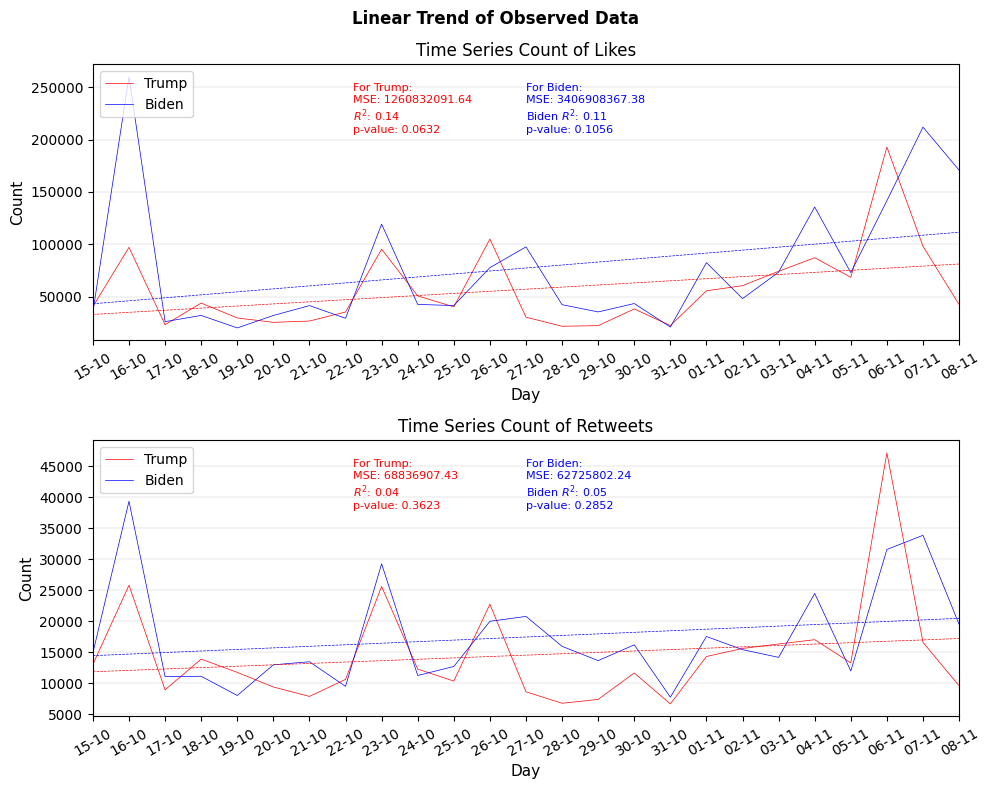

In [119]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)

# Define the columns to plot for each subplot
columns_1 = ["likes", "retweet_count"]
titles = ["Likes", "Retweets"]

for index, ax in enumerate(axes.flat):
    trump_count.plot(ax=ax, x="created_at", y=columns_1[index], color="red", linewidth=0.5, label="Trump", legend=False)
    biden_count.plot(ax=ax, x="created_at", y=columns_1[index], color="blue", label="Biden", linewidth=0.5, legend=False)
    
    # Remove any existing legend to avoid duplicates
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Show the legend
    ax.legend(["Trump", "Biden"], loc="upper left")

    # Set major ticks to daily interval
    ax.xaxis.set_major_locator(DayLocator())  # Show ticks for each day
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))  # Set the date format

    # Fit and plot a linear trend line for Trump
    x_trump = np.arange(len(trump_count["created_at"]))
    y_trump = trump_count[columns_1[index]]
    slope_trump, intercept_trump, r_value_trump, p_value_trump, std_err_trump = stats.linregress(x_trump, y_trump)

    # Create trend line values
    y_trend_trump = slope_trump * x_trump + intercept_trump
    ax.plot(trump_count["created_at"], y_trend_trump, color="red", linestyle="--", linewidth=0.5)

    # Calculate MSE and R^2 for Trump trend
    mse_trump = mean_squared_error(y_trump, y_trend_trump)
    r2_trump = r2_score(y_trump, y_trend_trump)

    # Fit and plot a linear trend line for Biden
    x_biden = np.arange(len(biden_count["created_at"]))
    y_biden = biden_count[columns_1[index]]
    slope_biden, intercept_biden, r_value_biden, p_value_biden, std_err_biden = stats.linregress(x_biden, y_biden)

    # Create trend line values
    y_biden_trend = slope_biden * x_biden + intercept_biden
    ax.plot(biden_count["created_at"], y_biden_trend, color="blue", linestyle="--", linewidth=0.5)

    # Calculate MSE and R^2 for Biden trend
    mse_biden = mean_squared_error(y_biden, y_biden_trend)
    r2_biden = r2_score(y_biden, y_biden_trend)

    # Annotate MSE, R^2, and p-values on the plot
    ax.annotate(f'For Trump:\nMSE: {mse_trump:.2f}\n$R^2$: {r2_trump:.2f}\np-value: {p_value_trump:.4f}', 
                xy=(0.3, 0.750), xycoords='axes fraction', color='red', fontsize=8)
    
    ax.annotate(f'For Biden:\nMSE: {mse_biden:.2f}\nBiden $R^2$: {r2_biden:.2f}\np-value: {p_value_biden:.4f}', 
                xy=(0.5, 0.75), xycoords='axes fraction', color='blue', fontsize=8)

    ax.set_xlabel("Day", fontsize=11)
    ax.set_ylabel("Count", fontsize=11)
    ax.yaxis.grid(True, linewidth=0.2)
    ax.set_title(f"Time Series Count of {titles[index]}")

# Rotate x-tick labels for both subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

plt.suptitle("Linear Trend of Observed Data", fontweight="bold")
plt.tight_layout()

plt.savefig("Figure/1_1_Linear_trend_Observed.png")
plt.show()

For 10 days moving average

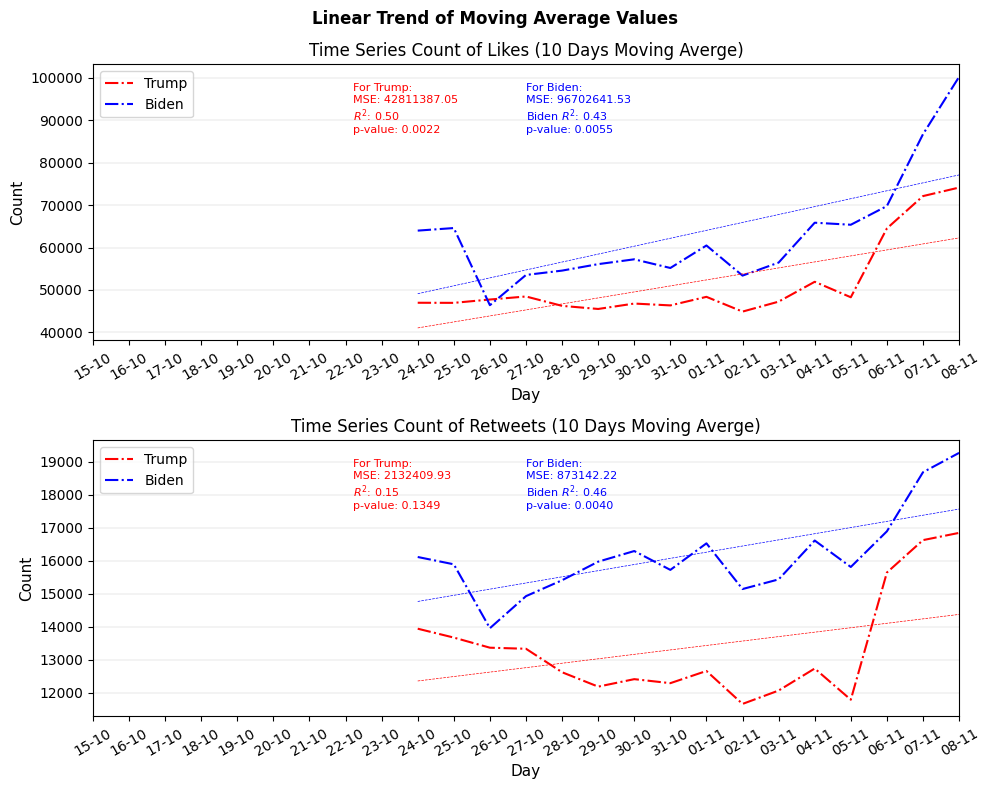

In [120]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)

# Define the columns to plot for each subplot
columns_2 = ["likes_ma", "retweet_ma"]
titles = ["Likes", "Retweets"]

for index, ax in enumerate(axes.flat):
    # Plotting the moving averages
    trump_count.plot(ax=ax, x="created_at", y=columns_2[index], color="red", linestyle="-.", linewidth=1.5)
    biden_count.plot(ax=ax, x="created_at", y=columns_2[index], color="blue", linestyle="-.", linewidth=1.5)

    # Remove any existing legend to avoid duplicates
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Show the legend
    ax.legend(["Trump", "Biden"], loc="upper left")

    # Set major ticks to daily interval
    ax.xaxis.set_major_locator(DayLocator())

    # Set the date format on the x-axis to 'Day-Month'
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))


    # Fit and plot a linear trend line for Trump
    mask_trump = ~trump_count[columns_2[index]].isna()  # Create a mask for non-NaN values
    x_trump = np.arange(len(trump_count["created_at"]))[mask_trump]
    y_trump = trump_count[columns_2[index]][mask_trump]
    slope_trump, intercept_trump, r_value_trump, p_value_trump, std_err_trump = stats.linregress(x_trump, y_trump)

    # Create trend line values
    y_trend_trump = slope_trump * x_trump + intercept_trump
    ax.plot(trump_count["created_at"][mask_trump], y_trend_trump, color="red", linestyle="--", linewidth=0.5)

    # Calculate MSE and R^2 for Trump trend
    mse_trump = mean_squared_error(y_trump, y_trend_trump)
    r2_trump = r2_score(y_trump, y_trend_trump)


    # Fit and plot a linear trend line for Biden
    mask_biden = ~biden_count[columns_2[index]].isna()  # Create a mask for non-NaN values
    x_biden = np.arange(len(biden_count["created_at"]))[mask_biden]
    y_biden = biden_count[columns_2[index]][mask_biden]
    slope_biden, intercept_biden, r_value_biden, p_value_biden, std_err_biden = stats.linregress(x_biden, y_biden)

    # Create trend line values
    y_biden_trend = slope_biden * x_biden + intercept_biden
    ax.plot(biden_count["created_at"][mask_biden], y_biden_trend, color="blue", linestyle="--", linewidth=0.5)

    # Calculate MSE and R^2 for Biden trend
    mse_biden = mean_squared_error(y_biden, y_biden_trend)
    r2_biden = r2_score(y_biden, y_biden_trend)

    # Annotate MSE, R^2, and p-values on the plot
    ax.annotate(f'For Trump:\nMSE: {mse_trump:.2f}\n$R^2$: {r2_trump:.2f}\np-value: {p_value_trump:.4f}', 
                xy=(0.3, 0.750), xycoords='axes fraction', color='red', fontsize=8)
    
    ax.annotate(f'For Biden:\nMSE: {mse_biden:.2f}\nBiden $R^2$: {r2_biden:.2f}\np-value: {p_value_biden:.4f}', 
                xy=(0.5, 0.75), xycoords='axes fraction', color='blue', fontsize=8)

   

    ax.set_xlabel("Day", fontsize=11)
    ax.set_ylabel("Count", fontsize=11)
    ax.yaxis.grid(True, linewidth=0.2)
    ax.set_title(f"Time Series Count of {titles[index]} (10 Days Moving Averge)")

# Rotate x-tick labels for both subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

plt.suptitle("Linear Trend of Moving Average Values", fontweight= "bold")
plt.tight_layout()
plt.savefig("Figure/1_2_Linear_trend_MA.png")
plt.show()

Mann-Kendall Trend Analysis

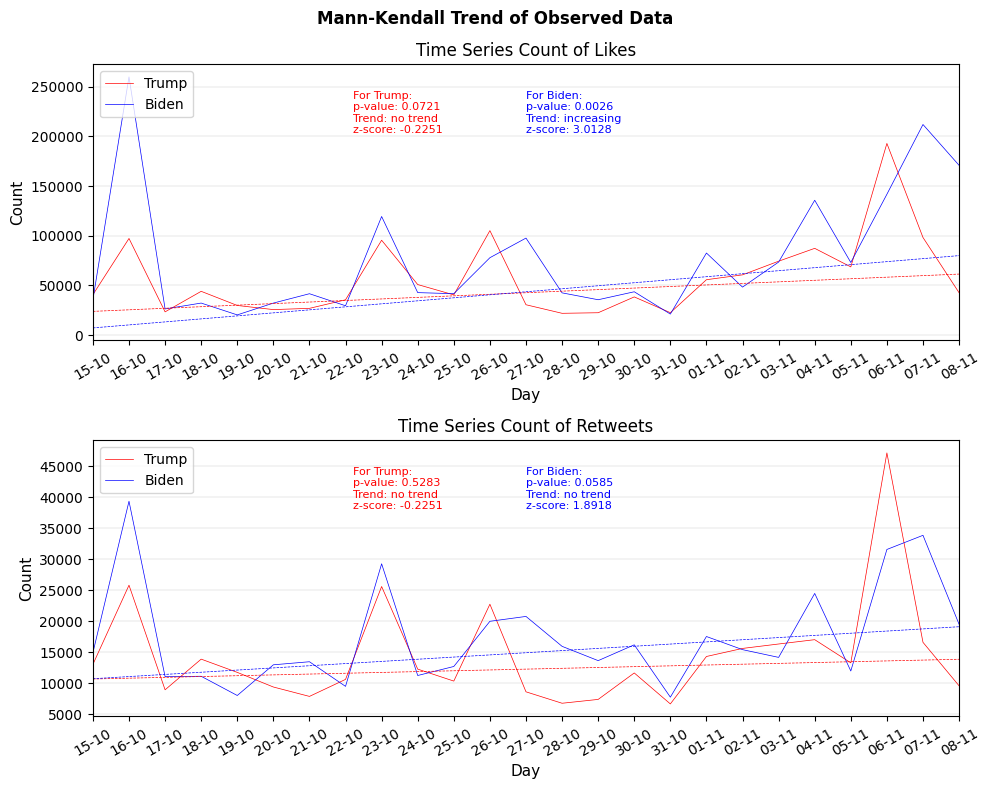

In [121]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)

# Define the columns to plot for each subplot
columns_1 = ["likes", "retweet_count"]
titles = ["Likes", "Retweets"]

for index, ax in enumerate(axes.flat):
    trump_count.plot(ax=ax, x="created_at", y=columns_1[index], color="red", linewidth=0.5, label="Trump", legend=False)
    biden_count.plot(ax=ax, x="created_at", y=columns_1[index], color="blue", label="Biden", linewidth=0.5, legend=False)
    
    # Remove any existing legend to avoid duplicates
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Show the legend
    ax.legend(["Trump", "Biden"], loc="upper left")

    # Set major ticks to daily interval
    ax.xaxis.set_major_locator(DayLocator())  # Show ticks for each day
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))  # Set the date format

    # Fit and plot a Mann-Kendall trend line for Trump
    mk_trump= mk.original_test(trump_count[columns_1[index]])
    x_trump = np.arange(len(trump_count["created_at"]))
    y_trump = trump_count[columns_1[index]]
    slope_trump=mk_trump.slope
    intercept_trump= mk_trump.intercept

    y_trend_trump= slope_trump * x_trump + intercept_trump

    ax.plot(trump_count["created_at"], y_trend_trump, color="red", linestyle="--", linewidth=0.5)

    # Identify trend
    #mse_trump = mean_squared_error(y_trump, y_trend_trump)
    #r2_trump = r2_score(y_trump, y_trend_trump)
    p_value_trump= mk_trump.p
    trend_trump= mk_trump.trend
    z_score_trump= mk_test.z

    # Fit and plot a Mann-Kendall trend line for Trump
    mk_biden= mk.original_test(biden_count[columns_1[index]])
    x_biden = np.arange(len(biden_count["created_at"]))
    y_biden = biden_count[columns_1[index]]
    slope_biden=mk_biden.slope
    intercept_biden= mk_biden.intercept

    y_trend_biden= slope_biden * x_biden + intercept_biden

    ax.plot(biden_count["created_at"], y_trend_biden, color="blue", linestyle="--", linewidth=0.5)

    # Identify trend
    #mse_trump = mean_squared_error(y_trump, y_trend_trump)
    #r2_trump = r2_score(y_trump, y_trend_trump)
    p_value_biden= mk_biden.p
    trend_biden= mk_biden.trend
    z_score_biden=mk_biden.z


    # Annotate MSE, R^2, and p-values on the plot
    ax.annotate(f'For Trump:\np-value: {p_value_trump:.4f}\nTrend: {trend_trump}\nz-score: {z_score_trump:0.4f}',
                xy=(0.3, 0.750), xycoords='axes fraction', color='red', fontsize=8)
    
    ax.annotate(f'For Biden:\np-value: {p_value_biden:.4f}\nTrend: {trend_biden}\nz-score: {z_score_biden:0.4f}', 
                xy=(0.5, 0.750), xycoords='axes fraction', color='blue', fontsize=8)

    ax.set_xlabel("Day", fontsize=11)
    ax.set_ylabel("Count", fontsize=11)
    ax.yaxis.grid(True, linewidth=0.2)
    ax.set_title(f"Time Series Count of {titles[index]}")

# Rotate x-tick labels for both subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

plt.suptitle("Mann-Kendall Trend of Observed Data", fontweight="bold")
plt.tight_layout()
plt.savefig("Figure/1_3_MK_trend_Observed.png")
plt.show()

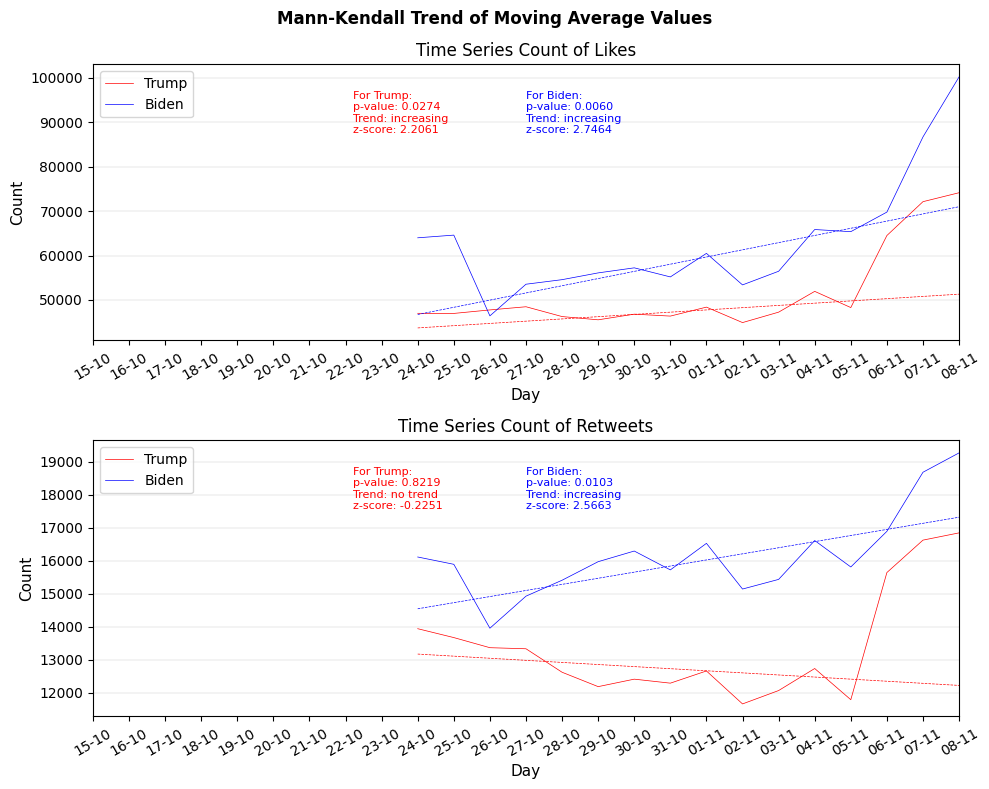

In [122]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)

# Define the columns to plot for each subplot
columns_1 = ["likes", "retweet_count"]
titles = ["Likes", "Retweets"]

for index, ax in enumerate(axes.flat):
    trump_count.plot(ax=ax, x="created_at", y=columns_2[index], color="red", linewidth=0.5, label="Trump", legend=False)
    biden_count.plot(ax=ax, x="created_at", y=columns_2[index], color="blue", label="Biden", linewidth=0.5, legend=False)
    
    # Remove any existing legend to avoid duplicates
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Show the legend
    ax.legend(["Trump", "Biden"], loc="upper left")

    # Set major ticks to daily interval
    ax.xaxis.set_major_locator(DayLocator())  # Show ticks for each day
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))  # Set the date format

    # Fit and plot a Mann-Kendall trend line for Trump
    mask_trump = ~trump_count[columns_2[index]].isna()  # Create a mask for non-NaN values
    mk_trump= mk.original_test(trump_count[columns_2[index]][mask_trump])
    x_trump = np.arange(len(trump_count["created_at"][mask_trump]))
    #y_trump = trump_count[columns_1[index]]
    slope_trump=mk_trump.slope
    intercept_trump= mk_trump.intercept

    y_trend_trump= slope_trump * x_trump + intercept_trump

    ax.plot(trump_count["created_at"][mask_trump], y_trend_trump, color="red", linestyle="--", linewidth=0.5)

    # Identify trend
    #mse_trump = mean_squared_error(y_trump, y_trend_trump)
    #r2_trump = r2_score(y_trump, y_trend_trump)
    p_value_trump= mk_trump.p
    trend_trump= mk_trump.trend
    z_score_trump= mk_trump.z

    # Fit and plot a Mann-Kendall trend line for Trump
    mask_biden = ~biden_count[columns_2[index]].isna()  # Create a mask for non-NaN values
    mk_biden= mk.original_test(biden_count[columns_2[index]][mask_biden])
    x_biden = np.arange(len(biden_count["created_at"][mask_biden]))
    #y_biden = biden_count[columns_1[index]]
    slope_biden=mk_biden.slope
    intercept_biden= mk_biden.intercept

    y_trend_biden= slope_biden * x_biden + intercept_biden

    ax.plot(biden_count["created_at"][mask_biden], y_trend_biden, color="blue", linestyle="--", linewidth=0.5)

    # Identify trend
    #mse_trump = mean_squared_error(y_trump, y_trend_trump)
    #r2_trump = r2_score(y_trump, y_trend_trump)
    p_value_biden= mk_biden.p
    trend_biden= mk_biden.trend
    z_score_biden=mk_biden.z


    # Annotate MSE, R^2, and p-values on the plot
    ax.annotate(f'For Trump:\np-value: {p_value_trump:.4f}\nTrend: {trend_trump}\nz-score: {z_score_trump:0.4f}',
                xy=(0.3, 0.750), xycoords='axes fraction', color='red', fontsize=8)
    
    ax.annotate(f'For Biden:\np-value: {p_value_biden:.4f}\nTrend: {trend_biden}\nz-score: {z_score_biden:0.4f}', 
                xy=(0.5, 0.750), xycoords='axes fraction', color='blue', fontsize=8)

    ax.set_xlabel("Day", fontsize=11)
    ax.set_ylabel("Count", fontsize=11)
    ax.yaxis.grid(True, linewidth=0.2)
    ax.set_title(f"Time Series Count of {titles[index]}")

# Rotate x-tick labels for both subplots
for ax in axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)

plt.suptitle("Mann-Kendall Trend of Moving Average Values", fontweight="bold")
plt.tight_layout()
plt.savefig("Figure/1_4_MK_trend_MA.png")
plt.show()